<a href="https://colab.research.google.com/github/munieshwarevakattu/CMPE257-FALL23-MUNIESHWAR-EVAKATTU/blob/Class-Activities/LinearRegressionComplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [ ]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)



In [ ]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

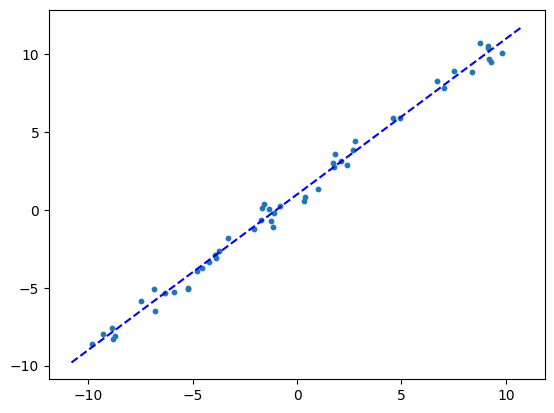

In [ ]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
points = []
colors = []
count = 0
plt.scatter(X1,Y, s = 10)
abline(f_w1,f_w0)
plt.show()

In [ ]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [ ]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [ ]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[0.02008751, 0.00023124],
       [0.00023124, 0.00061108]])

In [ ]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 0.01872807,  0.02122345,  0.02115453,  0.019219  ,  0.02202237,
         0.02164031,  0.01851741,  0.01888416,  0.01804999,  0.02221881,
         0.01979442,  0.01898091,  0.02063686,  0.02073235,  0.02235701,
         0.02057583,  0.01803395,  0.01918471,  0.02223423,  0.02211928,
         0.01850378,  0.02017402,  0.02182461,  0.02220406,  0.01918344,
         0.01969885,  0.01989356,  0.01932745,  0.0183639 ,  0.02049518,
         0.01910999,  0.01969057,  0.02172039,  0.01982137,  0.0197804 ,
         0.01903372,  0.01862181,  0.01807227,  0.01781602,  0.0222024 ,
         0.02048443,  0.01887672,  0.01961188,  0.01971893,  0.02031395,
         0.0179381 ,  0.02016624,  0.02070502,  0.02050396,  0.01983535],
       [-0.00336113,  0.00323303,  0.00305089, -0.00206383,  0.00534421,
         0.0043346 , -0.00391782, -0.00294865, -0.00515299,  0.00586332,
        -0.00054325, -0.002693  ,  0.00168293,  0.00193526,  0.00622851,
         0.00152166, -0.00519539, -0.00215445,  0.

In [ ]:
w = np.matmul(X_pi, Y)
w

array([0.97884648, 1.00305487])

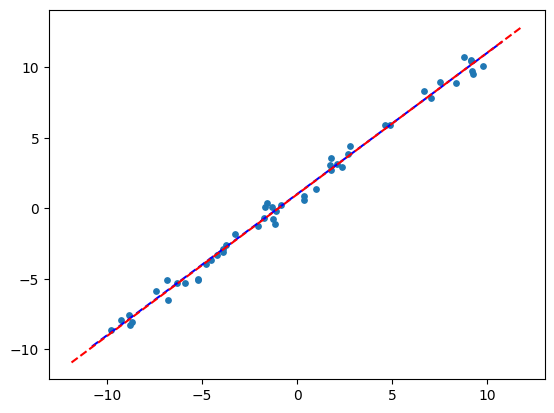

In [ ]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 15)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [ ]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))

12.924996230375884

In [ ]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1774.5192759355161

In [ ]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))

15.55902246827632

In [ ]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
np.sum(np.square(Y_pred_test_target-Y_test))

15.616916610999697

In [ ]:
def ridge_regularization(X, Y, lambda_alpha):
    XtX = np.matmul(np.transpose(X), X)
    n, m = XtX.shape
    penality = lambda_alpha * np.identity(m)
    XtX_reg = XtX + penality
    XtX_inv = np.linalg.inv(XtX_reg)
    X_pi = np.matmul(XtX_inv, np.transpose(X))
    w = np.matmul(X_pi, Y)
    return w


In [ ]:
def mean_squared_error(Y_pred, Y):
    return np.mean(np.square(Y_pred - Y))

In [ ]:
N = 50
data = generate_lr(N, 1, 1)

# Split the data into input (X) and target (Y)
X = [[i[0], i[1]] for i in data]
Y = [i[2] for i in data]


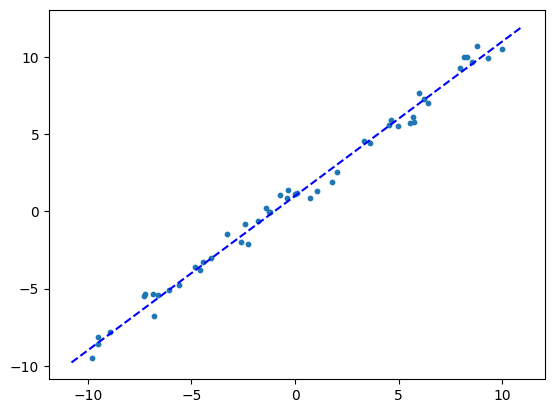

In [ ]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [ ]:
labda_alpha = [0, 0.001, 0.1, 1]

In [ ]:
mse_results = {}
# 5-fold cross-validation
k = 5
fold_size = N // k


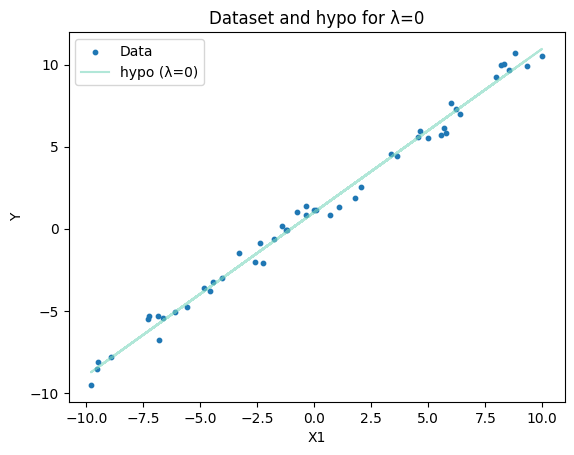

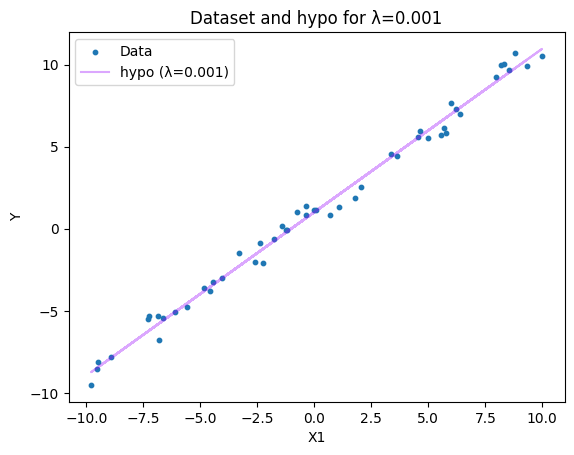

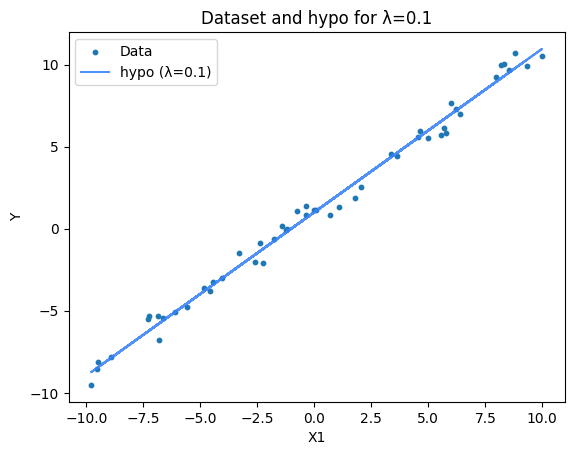

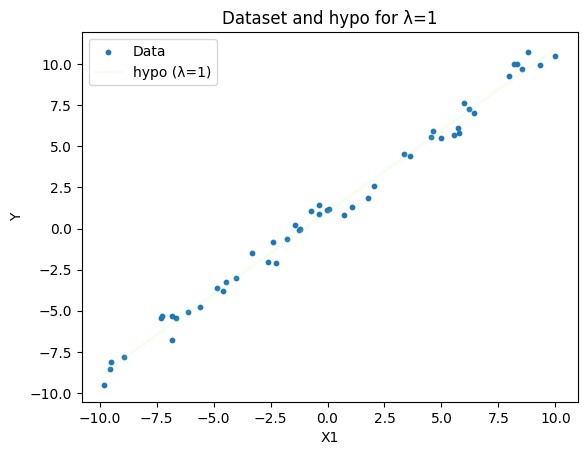

In [ ]:
for lambda_reg in labda_alpha:
    mse_list = []
    for fold in range(k):
        # Split the data into training and validation sets
        start = fold * fold_size
        end = (fold + 1) * fold_size
        X_train = X[:start] + X[end:]
        Y_train = Y[:start] + Y[end:]
        X_val = X[start:end]
        Y_val = Y[start:end]

        # Compute regularized weights on the training set
        w = ridge_regularization(X_train, Y_train, lambda_reg)


            # Predict on the validation set
        Y_pred_val = np.matmul(X_val, w)

        # Calculate mean squared error on the validation set
        mse = mean_squared_error(Y_pred_val, Y_val)
        mse_list.append(mse)

    hypothesis = np.matmul(X, w)
    label = f"Hypothesis (λ={lambda_reg})"
    color = np.random.rand(4,)
    plt.figure()
    plt.scatter(X1, Y, s=10, label="Data")
    plt.plot(X1, hypothesis, color=color, label=label)
    plt.legend()
    plt.xlabel("X1")
    plt.ylabel("Y")
    plt.title(f"Dataset and Hypothesis for λ={lambda_reg}")

    # Calculate the average MSE across all folds
    avg_mse = np.mean(mse_list)
    mse_results[lambda_reg] = avg_mse

In [ ]:
#The best-performing model (lowest MSE)
best_lam = min(mse_results, key=mse_results.get)

# The best model on the entire dataset
best_w = ridge_regularization(X, Y, best_lam)

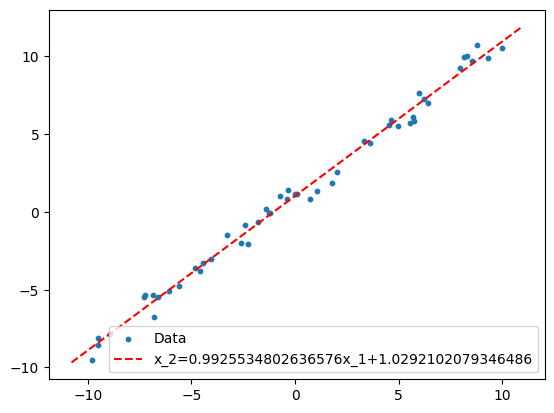

Best lambda: 0
Best model weights: [1.02921021 0.99255348]


In [ ]:
X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10, label="Data")
#abline(1, 1, color='b')
abline(best_w[1], best_w[0], color='r')
plt.legend()
plt.show()

print("Best lambda:", best_lam)
print("Best model weights:", best_w)